In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
def rn(rp, rpp, dt, G=1, M=1, L=1):
    """Implementing reccurence relation for r DE"""
    Fg = -G * M / rp**2
    l1 = L**2 / rp**3   # Meaingless variable name
    F2 = - G * M * L**2 / rp**4
    return 2*rp - rpp + dt**2 * (Fg + l1 + F2)

def phin(phip, rn, rp, dt, L=1):
    """Implementing reccurence relation for phi DE"""
    return phip + dt * L / (0.5 * (rn + rp)**2)

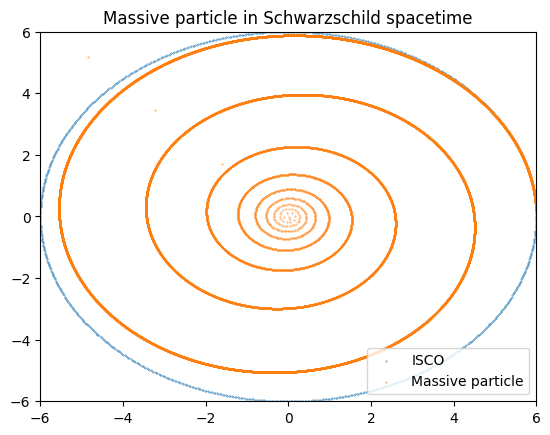

In [27]:
G = 1
M = 1

dtau = 0.001
L = 2 * np.sqrt(3) * G * M * 10

r0 = 6 * G * M
r1 = r0
# r1 = r0
phi0 = 0
phi1 = phi0 + L**2 / (r0**2) * dtau
# phi1 = phi0
iterations = 50000

def get_traj(r0, r1, phi0, phi1, iterations, dtau, M=1, L=1, G=1):
    """Get trajectory of a particle in a Schwarzschild spacetime"""
    rs = np.zeros(iterations)
    phis = np.zeros(iterations)

    rs[0], rs[1] = r0, r1
    phis[0], phis[1] = phi0, phi1

    rpp = r0
    rp = r1
    r = rp
    phip, phi = phi1, phi1
    for index in range(iterations):
        # Initialise previous values
        rp, rpp = r, rp
        phip = phi

        r = rn(rp, rpp, dtau, M = M, G=G)
        phi = phin(phip, r, rp, dtau, L=L)

        rs[index] = r
        phis[index] = phi

    return rs, phis

rs, phis = get_traj(r0, r1, phi0, phi1, iterations, dtau, M=M, L=L, G=G)

rs2, phis2 = get_traj(2*r0, r0, phi0, phi1, iterations, dtau, M=M, L=L, G=G)


theta = np.linspace(0, 2*np.pi, 1000)
ISCO = (6*G*M*np.sin(theta), 6*G*M*np.cos(theta))

plt.scatter(ISCO[0],ISCO[1], s=0.1, label="ISCO")

plt.scatter(rs * np.cos(phis), rs * np.sin(phis), s=0.1, label="Massive particle")


plt.xlim(-r0, r0)
plt.ylim(-r0, r0)

plt.title("Massive particle in Schwarzschild spacetime")

plt.legend()

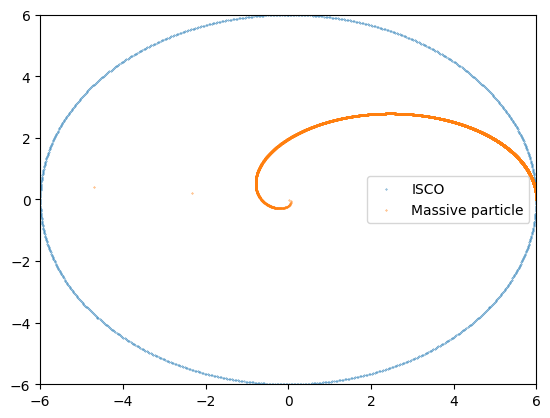

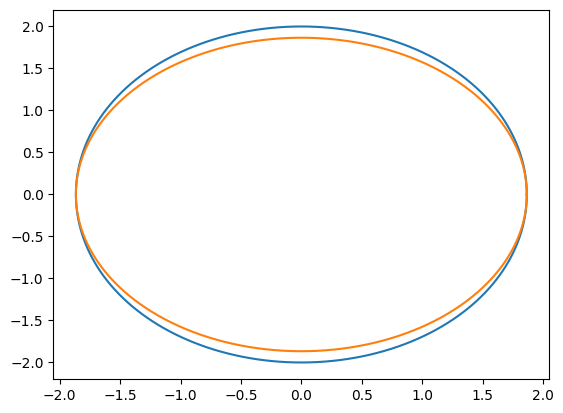

In [38]:
a=0.5

r_ir = 1 + np.sqrt(1-a**2 * np.cos(theta)**2)

r_eh = 1 + np.sqrt(1-a**2)


plt.plot(r_ir * np.cos(theta), r_ir * np.sin(theta), label="Infinite redshift")
plt.plot(r_eh * np.cos(theta), r_eh * np.sin(theta), label="Event horizon")
